In [1]:
%pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 13.2 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/11.5 MB 12.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.5 MB 12.0 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.5 MB 11.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/11.5 MB 11.2 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/11.5 MB 11.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.5 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 11.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.8/11.5 MB 11.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.3/11.5 MB 11.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.9/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------------- ----------------- 6.4/11.5 MB 11.7 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import zipfile
import os
import shutil
import pandas as pd
import csv
import time

In [3]:
def extract_zip(path):
  with zipfile.ZipFile(path, 'r') as zip_ref:
    temp_dir = 'raw-data/inmet/temp_extract'
    zip_ref.extractall(temp_dir)

    for root, dirs, files in os.walk(temp_dir):
      for file in files:
        file_path = os.path.join(root, file)
        target_path = os.path.join('raw-data/inmet', file)
        
        time.sleep(0.01)
        
        os.rename(file_path, target_path)

  shutil.rmtree(temp_dir)

In [42]:
for file in os.listdir('raw-data/inmet/zips'):
  if file.lower().endswith('.zip'):
    extract_zip(f'raw-data/inmet/zips/{file}')

In [49]:
caminho_csv_final = 'datasets/inmet/dados_inmet.csv'

cabecalho = ['DATA', 'HORA UTC', 'REGIÃO', 'UF', 'ESTAÇÃO', 'CODIGO (WMO)', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'DATA DE FUNDAÇÃO']

for arquivo in os.listdir('raw-data/inmet'):
    if arquivo.lower().endswith('.csv'):
        caminho_arquivo = os.path.join('raw-data/inmet', arquivo)

        # Ler as primeiras 8 linhas do arquivo para extrair as informações fixas
        with open(caminho_arquivo, 'r', encoding='ISO-8859-1') as f:
            info = {}
            info['REGIÃO'] = f.readline().strip().split(';')[1]
            info['UF'] = f.readline().strip().split(';')[1]
            info['ESTAÇÃO'] = f.readline().strip().split(';')[1]
            info['CODIGO (WMO)'] = f.readline().strip().split(';')[1]
            info['LATITUDE'] = f.readline().strip().split(';')[1]
            info['LONGITUDE'] = f.readline().strip().split(';')[1]
            info['ALTITUDE'] = f.readline().strip().split(';')[1]
            info['DATA DE FUNDAÇÃO'] = f.readline().strip().split(';')[1]

        # Lê o arquivo CSV novamente para processar as linhas de dados (ignorando as primeiras 8)
        with open(caminho_arquivo, 'r', encoding='ISO-8859-1') as f:
            # Pula as 8 primeiras linhas (já extraídas como informações fixas)
            for _ in range(8):
                next(f)
            
            # Leitura do cabeçalho completo (após as 8 primeiras linhas)
            reader = csv.reader(f, delimiter=';')
            cabecalho_dados = next(reader)  # Pega a primeira linha de dados como cabeçalho
            
            # Abre o arquivo final para escrita
            with open(caminho_csv_final, mode='a', newline='', encoding='ISO-8859-1') as csvfile:
                writer = csv.writer(csvfile)

                # Se o arquivo final estiver vazio, escreve o cabeçalho completo
                if csvfile.tell() == 0:
                    # Combina o cabeçalho fixo com o cabeçalho extraído do arquivo CSV
                    writer.writerow(cabecalho_dados + cabecalho[2:])  # Evita duplicação do cabeçalho fixo

                # Processa cada linha de dados
                for row in reader:
                    # Extraímos a data e a hora da linha de dados
                    data = row[0]
                    hora_utc = row[1]
                    
                    # Construa a linha com as informações extraídas + dados do arquivo
                    linha = [data, hora_utc] + [info[key] for key in ['REGIÃO', 'UF', 'ESTAÇÃO', 'CODIGO (WMO)', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'DATA DE FUNDAÇÃO']] + row[2:]
                    
                    # Escreve a linha no arquivo final
                    writer.writerow(linha)

In [4]:
df_inmet = pd.read_csv('datasets/inmet/dados_inmet.csv', encoding='ISO-8859-1')

C:\Users\ellie\AppData\Local\Temp\ipykernel_18524\2053502843.py:1: DtypeWarning: Columns (6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inmet = pd.read_csv('datasets/inmet/dados_inmet.csv', encoding='ISO-8859-1')


In [5]:
df_inmet.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,"VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,REGIÃO,UF,ESTAÇÃO,CODIGO (WMO),LATITUDE,LONGITUDE,ALTITUDE,DATA DE FUNDAÇÃO
0,2004-01-01,00:00,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,...,"21,5","17,5","16,6",77,72,72,87,"4,9",",8",NaN
1,2004-01-01,01:00,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,...,"20,7","17,8","16,7",82,72,80,274,"2,2",1,NaN
2,2004-01-01,02:00,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,...,"20,8","17,8","17,1",82,75,75,30,"4,6","1,9",NaN
3,2004-01-01,03:00,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,...,"21,1","17,9","17,1",81,74,80,303,"3,2","1,1",NaN
4,2004-01-01,04:00,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,...,21,"17,8","17,7",82,81,81,318,"2,7","1,1",NaN


In [26]:
%pip install openpyxl
%pip install xlrd
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\ellie\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 802.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.0 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   - ------

In [ ]:
import pandas as pd

In [34]:
energia_anuario = pd.read_excel('datasets/BR_Dados_Anuario_Estatistico_Energia_Eletrica_2014-2023.xlsx')
consumo_mensal = pd.read_excel('datasets/BR_Dados_Consumo_Mensal_2004-2024.xlsx')
geracao_energia = pd.read_csv('datasets/BR_Empreendimento_Geracao_Energia_2001-2024.csv', sep=';')
feriados = pd.read_excel('datasets/BR_Feriados_Nacionais_2001-2099.xls')
populacao = pd.read_csv('datasets/BR_Populacao_Residente_Economicamente_Ativa_PIB_2000-2023.csv', sep=';', encoding='ISO-8859-1')

In [35]:
energia_anuario['Data'] = pd.to_datetime(energia_anuario['Data'], format='%Y%m%d')
consumo_mensal['Data'] = pd.to_datetime(consumo_mensal['Data'], format='%Y%m%d')
feriados['Data'] = pd.to_datetime(feriados['Data'], errors='coerce', format='%d/%m/%Y')
populacao['Ano'] = populacao['Ano'].astype(int)

In [36]:
energia_anuario['Ano'] = energia_anuario['Data'].dt.year
energia_anuario['Mes'] = energia_anuario['Data'].dt.month
consumo_mensal['Ano'] = consumo_mensal['Data'].dt.year
consumo_mensal['Mes'] = consumo_mensal['Data'].dt.month
feriados['DiaSemana'] = feriados['Data'].dt.weekday

In [37]:
populacao.head()

,Ano,População residente\nx 1000,População economicamente ativa (PEA)\nx 1000,Pessoas Ocupadas\nx 1000,R$ correntes,R$ de 2023,Em dólares correntes como paridade de poder de compra (PPC),Fator de conversão para paridade do poder de compra (PPC)
0,2000,173.766,...,...,"1.199.092,10","6.589.019,10","1.582.133,90","0,757895424"
1,2001,176.209,84.886,76.102,"1.315.755,50","6.680.599,60","1.640.243,90","0,802170642"
2,2002,178.499,87.750,78.895,"1.488.787,30","6.884.589,20","1.716.595,70","0,867290573"
3,2003,180.708,89.485,79.986,"1.717.950,40","6.963.130,50","1.770.456,70","0,970343048"
4,2004,182.865,93.564,84.443,"1.957.751,20","7.364.204,40","1.922.785,80","1,018184751"


In [38]:
consumo_mensal['Feriado'] = consumo_mensal['Data'].isin(feriados['Data'])

consumo_mensal = consumo_mensal.merge(populacao[['Ano', 'População residente\nx 1000']], on='Ano', how='left')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

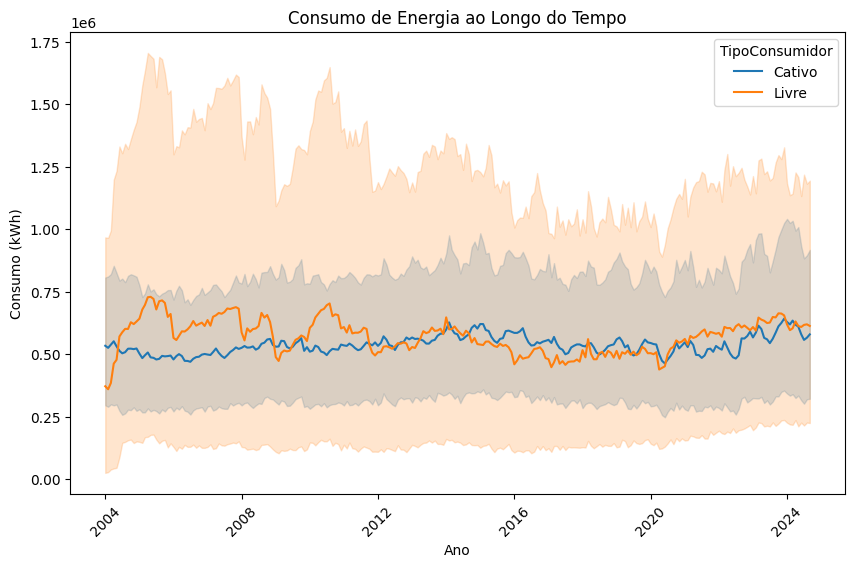

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=consumo_mensal, x='Data', y='Consumo', hue='TipoConsumidor')
plt.title('Consumo de Energia ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)
plt.show()

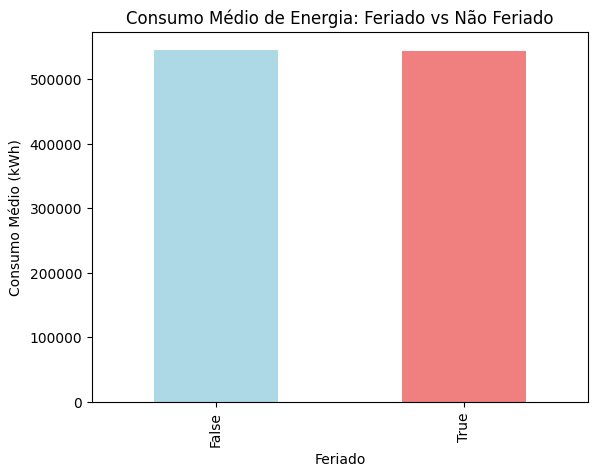

In [22]:
feriados_consumo = consumo_mensal.groupby('Feriado')['Consumo'].mean()
feriados_consumo.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Consumo Médio de Energia: Feriado vs Não Feriado')
plt.ylabel('Consumo Médio (kWh)')
plt.show()

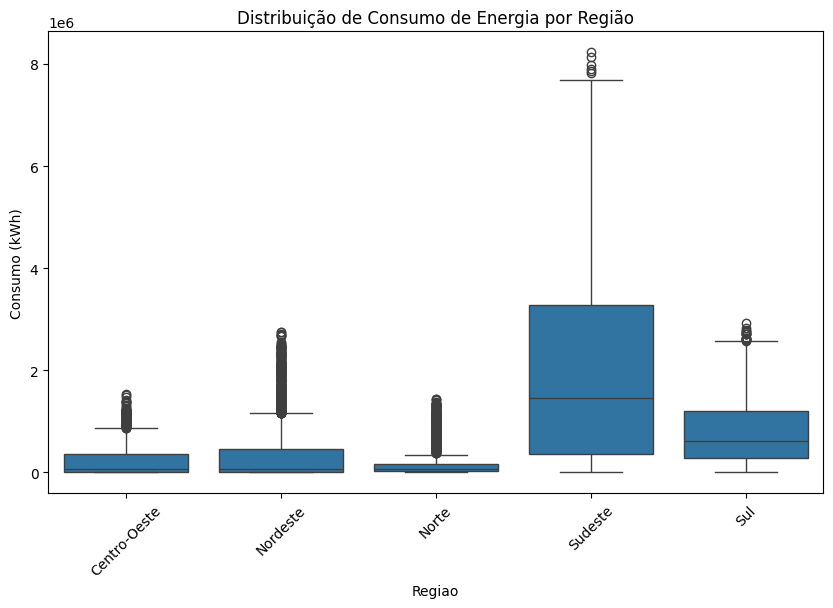

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=consumo_mensal, x='Regiao', y='Consumo')
plt.title('Distribuição de Consumo de Energia por Região')
plt.ylabel('Consumo (kWh)')
plt.xticks(rotation=45)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
consumo_mensal.head()

,Data,DataExcel,Regiao,Sistema,Classe,TipoConsumidor,Consumo,Consumidores,Ano,Mes,Feriado,População residente\nx 1000
0,2024-09-01,2024-09-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Cativo,440778.355,501914.0,2024,9,False,NaN
1,2024-09-01,2024-09-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Comercial,Livre,202637.066,2362.0,2024,9,False,NaN
2,2024-09-01,2024-09-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Cativo,88018.441,31043.0,2024,9,False,NaN
3,2024-09-01,2024-09-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Industrial,Livre,889059.013,994.0,2024,9,False,NaN
4,2024-09-01,2024-09-01,Centro-Oeste,SUDESTE / CENTRO - OESTE,Outros,Cativo,363105.975,63157.0,2024,9,False,NaN


In [55]:
consumo_mensal_dummies = pd.get_dummies(
    consumo_mensal,
)

consumo_mensal_dummies.dropna()

X = consumo_mensal_dummies[['Ano', 'Mes', 'Consumidores', 'População residente\nx 1000']]
y = consumo_mensal_dummies['Consumo']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model = HistGradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 239856.2663756133
RMSE: 493944.5460819732


c:\Users\ellie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


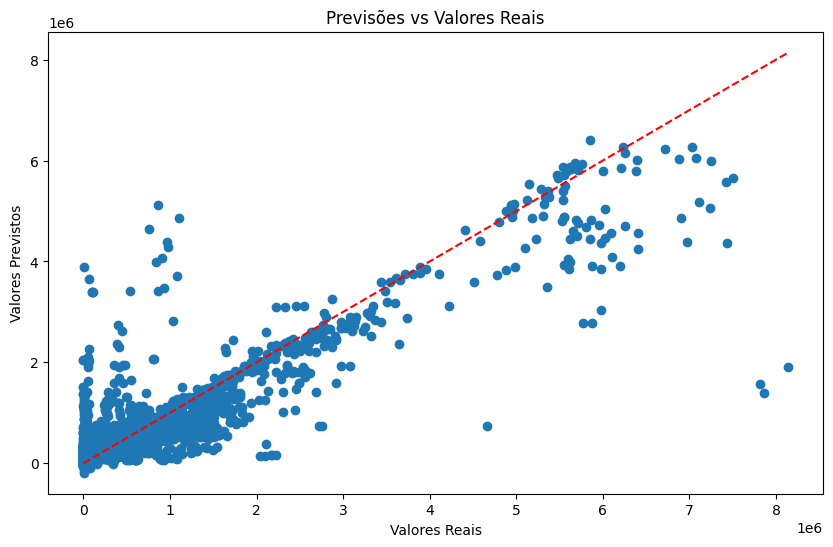

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsões vs Valores Reais')
plt.show()